# UC Berkeley Extension Data Analytics Program

## Homework 5: Matplotlib

Task: Pymaceuticals

Submitted by: Alejandro Montesinos

Date: March 21, 2019

## Abstract

In this exercise I analyze the results of the most recent clinical trial by Pymaceuticals Inc., a pharmaceutical company that specializes in drug-based, anti-cancer pharmaceuticals. The aim of the study was testing potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In the study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. In this analysis I present the results of four of the treatments tested by Pymaceuticals: Capomulin, Infubinol, Ketapril, and Placebo.

A summary of findings is presented below:

- Of the 4 tratments analized only Capomulin reduced tumor volume during the treatment period. From 45 to 36.24 mm3.

- Infubinol and Ketapril experienced an increase in tumor colume durign the study period. The standard erroros suggest their results are no different from the placebo. Thus suggesting no effect of those treatments.

- Of the analyzed treatments Capomulin experienced the lowest increase in metastatic spread (0 to 1.5). Ketapril, on the other hand, experienced the greatest increase in metastatic spread, almost twice compared to Capomulin, and the standard errors suggest Ketapril results are no different from the placebo.

- Capomulin showed the highest survival rate. By the en of the study period 84% of the treated population survived. Infubinol had the lowestsurvival rate. Only 36% of the treated subjects were alive by the end of the study. 

- In summary, Capomulin had the best performance among all treatments. It was the only one to show a decrease in tumor volume, it experienced the lowest increase in metastatic spread and the hisghest survival rate.

In [1]:
#Pre-setting
%matplotlib notebook

In [2]:
# Import Dependencies
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

# Preliminary work

In [3]:
# Import CSV file as a DataFrame
trial_df = pd.read_csv("./data/clinicaltrial_data.csv")
drug_df  = pd.read_csv("./data/mouse_drug_data.csv")

#Display top 5 rows of each data frame
print("Clinical Trial Data")
print("--"* 20)
print(trial_df.head())
print(" ")
print(" ")
print("Mouse Drug Data")
print("--"* 20)
print(drug_df.head())

Clinical Trial Data
----------------------------------------
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
 
 
Mouse Drug Data
----------------------------------------
  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn


In [4]:
#Drugs of interest. Having them in a list will be useful later on
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
print(drug_list)

['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


In [5]:
#Combine data into one dataset and select treatments of interest
combined_df = pd.merge(trial_df, drug_df, on="Mouse ID", how="inner") #Merge Clinical Trial and Drug data together
analytical_df = combined_df.loc[combined_df["Drug"].isin(drug_list)]  #Select only treatment of interest
analytical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# 1. Tumor volume change over time 

In [6]:
#Get average by time point and drug
average_df = analytical_df.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
average_df["Tumor Volume (mm3)"] = round(average_df["Tumor Volume (mm3)"],2)
average_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.00
1,Capomulin,5,44.27
2,Capomulin,10,43.08
3,Capomulin,15,42.06
4,Capomulin,20,40.72


In [7]:
# Get Standar Eerror of the Mean

#Select column of interest
selcol = analytical_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
selcol = selcol.groupby(["Drug","Timepoint"]).sem()   #Calculate SEM

#Store results in a new data frame
sem_df = selcol.reset_index()
sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
#Get axis to plot the graph

# X-Axis:
x_axis = average_df["Timepoint"].unique()

# Y-axis
y_c = list(average_df.loc[average_df["Drug"] == "Capomulin", "Tumor Volume (mm3)"])
y_i = list(average_df.loc[average_df["Drug"] == "Infubinol", "Tumor Volume (mm3)"])
y_k = list(average_df.loc[average_df["Drug"] == "Ketapril" , "Tumor Volume (mm3)"])
y_p = list(average_df.loc[average_df["Drug"] == "Placebo"  , "Tumor Volume (mm3)"])

# Y-errors
y_cerror = list(sem_df.loc[sem_df["Drug"] == "Capomulin", "Tumor Volume (mm3)"])
y_ierror = list(sem_df.loc[sem_df["Drug"] == "Infubinol", "Tumor Volume (mm3)"])
y_kerror = list(sem_df.loc[sem_df["Drug"] == "Ketapril" , "Tumor Volume (mm3)"])
y_perror = list(sem_df.loc[sem_df["Drug"] == "Placebo"  , "Tumor Volume (mm3)"])

<IPython.core.display.Javascript object>


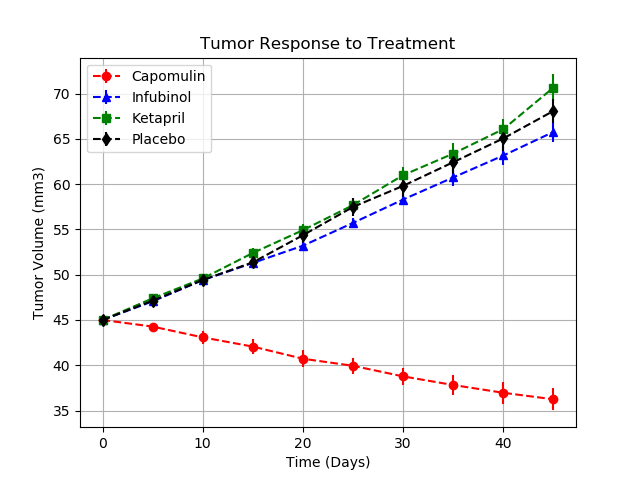

In [9]:
#Generate the plot
plt.errorbar(x_axis, y_c, yerr=y_cerror, linestyle="--", marker="o", color="red", label="Capomulin")
plt.errorbar(x_axis, y_i, yerr=y_ierror, linestyle="--", marker="^", color="blue", label="Infubinol")
plt.errorbar(x_axis, y_k, yerr=y_kerror, linestyle="--", marker="s", color="green", label="Ketapril")
plt.errorbar(x_axis, y_p, yerr=y_perror, linestyle="--", marker="d", color="black", label="Placebo")

plt.legend(loc="upper left")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()
plt.savefig("./graphs/Fig1_Tumor_Response_To_Treatment.png")

# 2. Number of metastatic sites changes over time

In [10]:
#Pre-setting
%matplotlib notebook

In [11]:
#Get average Metastatic Sites
avg_sites_df = analytical_df.groupby(["Drug","Timepoint"], as_index=False)["Metastatic Sites"].mean()
avg_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Get Standar Eerror of the Mean

#Select column of interest
selcol2 = analytical_df[["Drug","Timepoint","Metastatic Sites"]]
selcol2 = selcol2.groupby(["Drug","Timepoint"]).sem()   #Calculate SEM

#Store results in a new data frame
sem_sites_df = selcol2.reset_index()
sem_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
#Get axis to plot the graph

# Y-axis
y_cs = list(avg_sites_df.loc[average_df["Drug"] == "Capomulin", "Metastatic Sites"])
y_is = list(avg_sites_df.loc[average_df["Drug"] == "Infubinol", "Metastatic Sites"])
y_ks = list(avg_sites_df.loc[average_df["Drug"] == "Ketapril" , "Metastatic Sites"])
y_ps = list(avg_sites_df.loc[average_df["Drug"] == "Placebo"  , "Metastatic Sites"])

# Y-errors
y_cserror = list(sem_sites_df.loc[sem_sites_df["Drug"] == "Capomulin", "Metastatic Sites"])
y_iserror = list(sem_sites_df.loc[sem_sites_df["Drug"] == "Infubinol", "Metastatic Sites"])
y_kserror = list(sem_sites_df.loc[sem_sites_df["Drug"] == "Ketapril" , "Metastatic Sites"])
y_pserror = list(sem_sites_df.loc[sem_sites_df["Drug"] == "Placebo"  , "Metastatic Sites"])

<IPython.core.display.Javascript object>


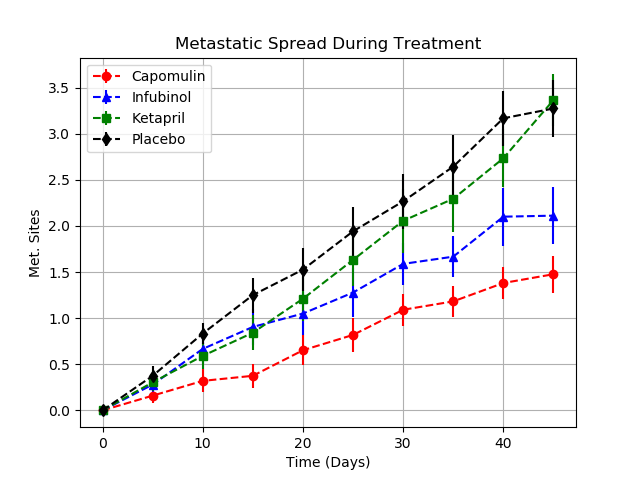

In [14]:
#Generate the plot
plt.errorbar(x_axis, y_cs, yerr=y_cserror, linestyle="--", marker="o", color="red", label="Capomulin")
plt.errorbar(x_axis, y_is, yerr=y_iserror, linestyle="--", marker="^", color="blue", label="Infubinol")
plt.errorbar(x_axis, y_ks, yerr=y_kserror, linestyle="--", marker="s", color="green", label="Ketapril")
plt.errorbar(x_axis, y_ps, yerr=y_pserror, linestyle="--", marker="d", color="black", label="Placebo")

plt.legend(loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.show()
plt.savefig("./graphs/Fig2_Metastatic_Spread_During_Treatment.png")

# 3. Survival Rates Analysis

In [15]:
%matplotlib notebook

In [16]:
#Mouse counts
counts_df = analytical_df.groupby(["Drug","Timepoint"], as_index=False)["Mouse ID"].count()
counts_df = counts_df.rename(columns={"Mouse ID":"Mouse Count"})
counts_df["Survival Rate"] = (counts_df["Mouse Count"]/25)*100                  #Compute survival rate
counts_df

,Drug,Timepoint,Mouse Count,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0
5,Capomulin,25,22,88.0
6,Capomulin,30,22,88.0
7,Capomulin,35,22,88.0
8,Capomulin,40,21,84.0
9,Capomulin,45,21,84.0


In [17]:
#Get axis to plot the graph

# Y-axis
y_ccnt = list(counts_df.loc[counts_df["Drug"] == "Capomulin", "Survival Rate"])
y_icnt = list(counts_df.loc[counts_df["Drug"] == "Infubinol", "Survival Rate"])
y_kcnt = list(counts_df.loc[counts_df["Drug"] == "Ketapril" , "Survival Rate"])
y_pcnt = list(counts_df.loc[counts_df["Drug"] == "Placebo"  , "Survival Rate"])

<IPython.core.display.Javascript object>


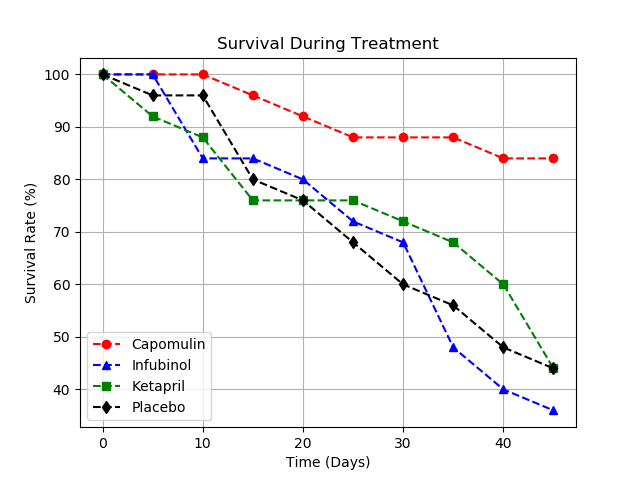

In [18]:
#Generate the plot
plt.plot(x_axis, y_ccnt, linestyle="--", marker="o", color="red", label="Capomulin")
plt.plot(x_axis, y_icnt, linestyle="--", marker="^", color="blue", label="Infubinol")
plt.plot(x_axis, y_kcnt, linestyle="--", marker="s", color="green", label="Ketapril")
plt.plot(x_axis, y_pcnt, linestyle="--", marker="d", color="black", label="Placebo")

plt.legend(loc="lower left")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.show()
plt.savefig("./graphs/Fig3_Survival_During_Treatment.png")

# 4. Total tumor volume change 

In [19]:
%matplotlib notebook

In [20]:
#Get first value
first_obs = average_df.groupby("Drug").nth(0) 
first_obs = first_obs.rename(columns={"Tumor Volume (mm3)":"First Vol"})

#Get last values
last_obs = average_df.groupby("Drug").nth(9) 
last_obs = last_obs.rename(columns={"Tumor Volume (mm3)":"Last Vol"})

#Merge the two datasets together and compute the change
total_change = pd.merge(first_obs, last_obs, on="Drug", how="inner")
total_change = total_change[["First Vol", "Last Vol"]]
total_change["Change"] = round(((total_change["Last Vol"]-total_change["First Vol"])/total_change["First Vol"])*100,2)
total_change


,First Vol,Last Vol,Change
Drug,,,
Capomulin,45.0,36.24,-19.47
Infubinol,45.0,65.76,46.13
Ketapril,45.0,70.66,57.02
Placebo,45.0,68.08,51.29


In [21]:
# Get axis for the graph
ybar = list(total_change["Change"])
xbar = np.arange(len(ybar))

In [22]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in xbar]

In [23]:
#Define the colors based of negative or positive change
colors = ["red" if y > 0 else "green" for y in ybar]
colors

['green', 'red', 'red', 'red']

<IPython.core.display.Javascript object>


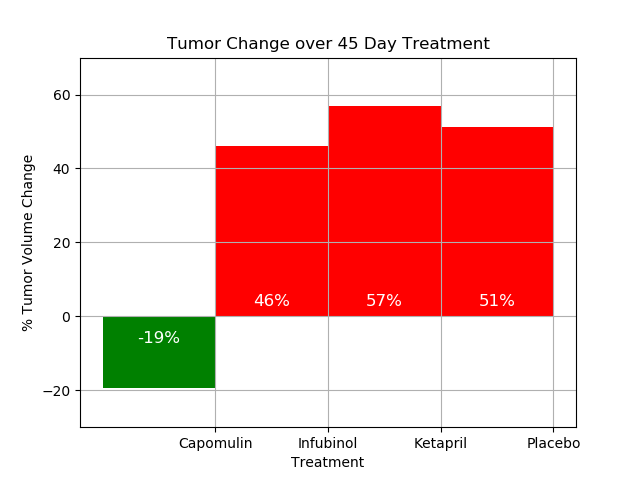

In [24]:
# Plot and edit the graph
plt.xticks(tick_locations, drug_list)
plt.bar(xbar, ybar, align="edge", width=-1, color=colors)

#Get labels 
for i in range(len(ybar)):
    if i > 0:
        label_position = 2
    else:
        label_position = -8
    plt.text(x = xbar[i]-0.5 , y = label_position, s = str(int(ybar[i]))+"%", ha="center", va="bottom", color="white", size = 12)
    
plt.ylim(-30, 70)
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Treatment")
plt.title("Tumor Change over 45 Day Treatment")
plt.grid()
plt.show()
plt.savefig("./graphs/Fig4_Total_Tumor_Change.png")
